In [1]:
!pip install nltk requests pandas seaborn openpyxl PRAW plotly gensim sklearn spacy reportlab
import nltk
import networkx as nx
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import word_tokenize
from nltk import stem
from nltk.corpus import stopwords
import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models import Word2Vec
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import gensim.downloader as api
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import zscore
import gzip
import os
import spacy
from IPython.display import FileLink
import re
from scipy import stats
from scipy.stats import ttest_1samp
from scipy.stats import f_oneway
from collections import Counter
import string
from reportlab.lib.pagesizes import letter
from reportlab.lib import colors
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, Image
import io
from scipy.stats import ttest_rel
lemmatizer = WordNetLemmatizer()
stemmer = stem.PorterStemmer()
stop_words = set(stopwords.words('english'))
punct = list(string.punctuation)
punctuations = string.punctuation
sns.set()


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [93]:
vad = pd.read_excel('/Users/louisvsbigmac/Documents/Office 365/xlsx/vad.xlsx', index_col = 0)
df1 = pd.read_csv('/Users/louisvsbigmac/Documents/Office 365/xlsx/Research_results.csv', index_col = 0)

In [94]:
transcripts_combined = " ".join(df1['transcript'].astype(str).tolist())

In [95]:
def calculate_vad(transcript):
    tokenized_words = word_tokenize(transcript)
    lc_tokens = [i.lower() for i in tokenized_words]
    lc_filtered_tokens = [word for word in lc_tokens if word not in punctuations]
    lc_fully_filtered_tokens = [word for word in lc_filtered_tokens if word not in stop_words]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in lc_fully_filtered_tokens]
    emo = []
    words = []
    for i in lemmatized_tokens:
        if i in vad.index:
            emo.append(vad.loc[i])
            words.append(i)
    emo_df = pd.DataFrame(emo, index=words)
    avg_v = (emo_df['valence'].mean())*2 -1
    avg_a = (emo_df['arousal'].mean())*2 -1
    return avg_v, avg_a
df1[['valence', 'arousal']] = df1['transcript'].apply(lambda x: pd.Series(calculate_vad(x)))

In [96]:
df1_valence_mean = (vad['valence'].mean())*2 -1
df1_arousal_mean = (vad['arousal'].mean())*2 -1
df1_valence_std = vad['valence'].std()*2
df1_arousal_std = vad['arousal'].std()*2

In [97]:
threshold_valence_very_high = df1_valence_mean + df1_valence_std
threshold_valence_high = df1_valence_mean + (df1_valence_std/2)
threshold_valence_low = df1_valence_mean - (df1_valence_std/2)
threshold_valence_very_low = df1_valence_mean - df1_valence_std
threshold_arousal_very_high = df1_arousal_mean + df1_arousal_std
threshold_arousal_high = df1_arousal_mean + (df1_arousal_std/2)
threshold_arousal_low = df1_arousal_mean - (df1_arousal_std/2)
threshold_arousal_very_low = df1_arousal_mean - df1_arousal_std

In [98]:
data = {'Variable': ['threshold_valence_very_high_more_than', 'threshold_valence_high_more_than', 'threshold_valence_low_less_than', 'threshold_valence_very_low_less_than', 'threshold_arousal_very_high_more_than', 'threshold_arousal_high_more_than', 'threshold_arousal_low_less_than', 'threshold_arousal_very_low_less_than'],'Value': [0.4539066895376002, 0.274073220055281, -0.08559371890935749, -0.2654271883916767, 0.366098810938649, 0.21209339721306067, -0.09591743023811597, -0.2499228439637043]}
df_thresholds = pd.DataFrame(data)

In [66]:
df_thresholds.to_csv('thresholds_data.csv', index=False)

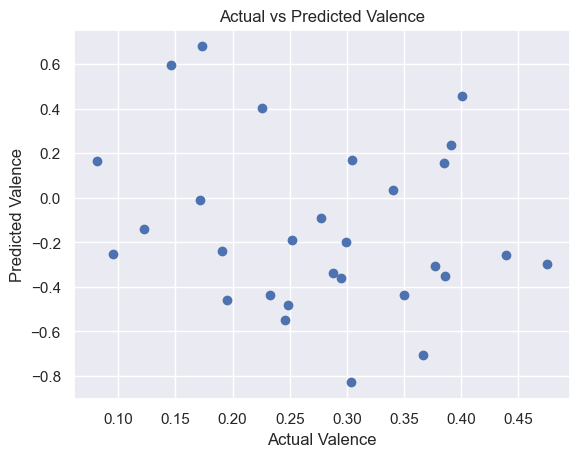

In [89]:
ml_predicted_valence = df1['ml_predicted_valence']
nlp_valence = df1['nlp_valence']
mse = mean_squared_error(nlp_valence, ml_predicted_valence)
mae = mean_absolute_error(nlp_valence, ml_predicted_valence)
r2 = r2_score(nlp_valence, ml_predicted_valence)
valence_metrics_df = pd.DataFrame({'Metric': ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'R-squared (R²)'],'Value': [mse, mae, r2]})
plt.scatter(nlp_valence, ml_predicted_valence)
plt.xlabel('Actual Valence')
plt.ylabel('Predicted Valence')
plt.title('Actual vs Predicted Valence')
plt.show()

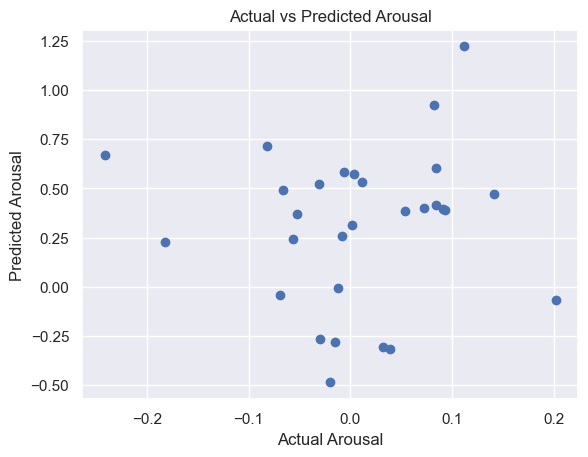

In [91]:
ml_predicted_arousal = df1['ml_predicted_arousal']
nlp_arousal = df1['nlp_arousal']
a_mse = mean_squared_error(nlp_arousal, ml_predicted_arousal)
a_mae = mean_absolute_error(nlp_arousal, ml_predicted_arousal)
a_r2 = r2_score(nlp_arousal, ml_predicted_arousal)
arousal_metrics_df = pd.DataFrame({
    'Metric': ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'R-squared (R²)'],
    'Value': [a_mse, a_mae, a_r2]})
plt.scatter(nlp_arousal, ml_predicted_arousal)
plt.xlabel('Actual Arousal')
plt.ylabel('Predicted Arousal')
plt.title('Actual vs Predicted Arousal')
plt.show()